In [2]:
import cv2

# Load YuNet face detector (comes with OpenCV 4.6+)
model_path = "face_detection_yunet_2023mar.onnx"  # download from: https://github.com/opencv/opencv_zoo/tree/main/models/face_detection_yunet
detector = cv2.FaceDetectorYN.create(
    model=model_path,
    config="",
    input_size=(320, 320),
    score_threshold=0.9,
    nms_threshold=0.3,
    top_k=5000,
    backend_id=cv2.dnn.DNN_BACKEND_OPENCV,
    target_id=cv2.dnn.DNN_TARGET_CPU
)

cap = cv2.VideoCapture(0)  # Webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    h, w, _ = frame.shape
    detector.setInputSize((w, h))

    faces = detector.detect(frame)[1]

    if faces is not None:
        for face in faces:
            x, y, w, h = map(int, face[:4])
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow("Development Face Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [5]:
import cv2
import os
import urllib.request
skip_frames = 5  # Process every 5th frame
frame_count = 0
# ---- 1. YuNet model download if missing ----
model_url = "https://github.com/opencv/opencv_zoo/raw/main/models/face_detection_yunet/face_detection_yunet_2023mar.onnx"
model_path = "face_detection_yunet_2023mar.onnx"

if not os.path.exists(model_path):
    print("[INFO] Downloading YuNet model...")
    urllib.request.urlretrieve(model_url, model_path)
    print("[INFO] Download complete.")

# ---- 2. Give your video URL here ----
video_url = "C:\\Users\\asus\\Downloads\\WhatsApp Video 2025-08-12 at 14.55.05_f6fa1dd6.mp4" # example

# Open the video directly from URL
cap = cv2.VideoCapture(video_url)
if not cap.isOpened():
    raise IOError("Cannot open video URL")

# ---- 3. Initialize YuNet ----
detector = cv2.FaceDetectorYN.create(
    model=model_path,
    config="",
    input_size=(320, 320),
    score_threshold=0.9,
    nms_threshold=0.3,
    top_k=5000,
    backend_id=cv2.dnn.DNN_BACKEND_OPENCV,
    target_id=cv2.dnn.DNN_TARGET_CPU
)

# ---- 4. Process video ----
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_count += 1
    if frame_count % skip_frames != 0:
        continue
    h, w, _ = frame.shape
    detector.setInputSize((w, h))

    _, faces = detector.detect(frame)

    if faces is not None:
        for face in faces:
            x, y, w_box, h_box = list(map(int, face[:4]))
            cv2.rectangle(frame, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)

    cv2.imshow("YuNet Face Detection (Video URL)", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = 'C:\\Users\\asus\\AppData\\Local\\Temp\\temp_cropped_face_WhatsApp_Image_2025-08-12_at_15.38.00_e133a776_LCDaZ8r.jpg'
# Read image
img = mpimg.imread(img_path)

# Display image
plt.imshow(img)
plt.axis('off')  # Optional: hides axis numbers
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\asus\\AppData\\Local\\Temp\\temp_cropped_face_WhatsApp_Image_2025-08-12_at_15.38.00_e133a776_LCDaZ8r.jpg'

TypeError: Image data of dtype <U109 cannot be converted to float

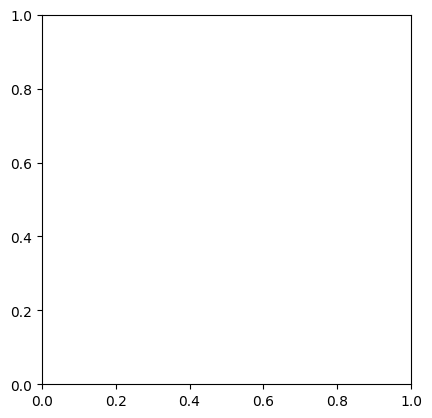

In [2]:
plt.imshow('C:\\Users\\asus\\AppData\\Local\\Temp\\temp_cropped_face_WhatsApp_Image_2025-08-12_at_15.38.00_e133a776_1x8SODR.jpg')